## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [326]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [327]:
#Reading the dataset 
df=pd.read_csv("ab_data.csv")

#Looking at the top 5 rows:
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [328]:
#Finding out number of rows
print("The dataset has {} rows.".format(df.shape[0]))

The dataset has 294478 rows.


c. The number of unique users in the dataset.

In [329]:
#Finding out number of unique users
print("There are {} unique users in the dataset.".format(df["user_id"].nunique()))

There are 290584 unique users in the dataset.


d. The proportion of users converted.

In [330]:
#Calculating the proportion of converted users
print("~{} % users converted.".format(round(df["converted"].mean()*100)))

~12 % users converted.


e. The number of times the `new_page` and `treatment` don't line up.

In [331]:
#Counting the mismatch between new_page and treatment
print("{} times treatments are wrongly not landing at the new page.".format(df[(df["landing_page"]!="new_page") & (df["group"]=="treatment")].count()[0]))
print("{} times controls are wrongly not landing at the old page.".format(df[(df["landing_page"]!="old_page") & (df["group"]=="control")].count()[0]))
print("Total number of mismatch is {}.".format(df[(df["landing_page"]!="new_page") & (df["group"]=="treatment")].count()[0]+df[(df["landing_page"]!="old_page") & (df["group"]=="control")].count()[0]))

1965 times treatments are wrongly not landing at the new page.
1928 times controls are wrongly not landing at the old page.
Total number of mismatch is 3893.


f. Do any of the rows have missing values?

In [332]:
#Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


There are no missing values in the dataset.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [333]:
#As discussed in Quiz 2, we should remove the records where we see any mismatch.
df2=df[((df["landing_page"]=="new_page") & (df["group"]=="treatment"))].append(df[(df["landing_page"]=="old_page") & (df["group"]=="control")])

In [334]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]
print("As expected, in df2 there are {} mismatches.".format(df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]))

As expected, in df2 there are 0 mismatches.


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [335]:
#Unique users in df2
print("There are {} unique users in df2.".format(df2["user_id"].nunique()))

There are 290584 unique users in df2.


b. There is one **user_id** repeated in **df2**.  What is it?

In [336]:
print("The repeated user id is {}.".format(np.array(df2[df2["user_id"].duplicated()==True])[0][0]))

The repeated user id is 773192.


c. What is the row information for the repeat **user_id**? 

In [337]:
#Printing the row info for repeated user id
print("The duplicated information:")
print(df2[df2["user_id"]==np.array(df2[df2["user_id"].duplicated()==True])[0][0]])

The duplicated information:
      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [338]:
#We would drop one of the duplicated rows.
df2=df2.query("user_id!=773192 or timestamp!='2017-01-14 02:55:59.590927'")

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [339]:
#Calculating probability of conversion
print("Irrespective of the pages, the probability of conversion is {}.".format(round(df2["converted"].mean(),4)))

Irrespective of the pages, the probability of conversion is 0.1196.


b. Given that an individual was in the `control` group, what is the probability they converted?

In [340]:
print("Given that an individual is in control group, the probability of conversion is {}.".format(round(df2.query("group=='control'")["converted"].mean(),4)))

Given that an individual is in control group, the probability of conversion is 0.1204.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [341]:
print("Given that an individual is in treatment group, the probability of conversion is {}.".format(round(df2.query("group=='treatment'")["converted"].mean(),4)))

Given that an individual is in treatment group, the probability of conversion is 0.1188.


d. What is the probability that an individual received the new page?

In [342]:
print("The probability of receiving a new page for any individual is {}.".format(round(df2.query("landing_page=='new_page'").shape[0]/df2.shape[0],4)))

The probability of receiving a new page for any individual is 0.5001.


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

> The probability of conversion is 0.1196 regardless of pages. For the control group, conversion probability is 0.1204, only slightly higher than that of the treatment group's, 0.1188. This increase in probability is not due to uneven distribution between control and traetment groups, as the probability of receiving a new page is 0.5 for any individual. <br/>
However, such a negligible increment is not enough to draw any conclusion. Also, the total timespan of the experiment and other unknown factors might be important and should be checked before taking any decision.



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null hypothesis, ** 
**$H_{0}$** : **$p_{old}$** >= **$p_{new}$** <br/>
**Alternative hypothesis, ** 
**$H_{1}$** : **$p_{old}$** < **$p_{new}$** <br/>

With level alpha = 0.05


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [343]:
p_new=round(df2["converted"].mean(),2)
print("According to assumptions in 2, the convert rate for p_new under the null is: {}".format(p_new))

According to assumptions in 2, the convert rate for p_new under the null is: 0.12


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [344]:
p_old=round(df2["converted"].mean(),2)
print("According to assumptions in 2, the convert rate for p_old under the null is: {}".format(p_old))

According to assumptions in 2, the convert rate for p_old under the null is: 0.12


c. What is $n_{new}$?

In [345]:
n_new=df2.query("landing_page=='new_page'").count()[0]
print("The value of n_new: {}".format(n_new))

The value of n_new: 145310


d. What is $n_{old}$?

In [347]:
n_old=df2.query("landing_page=='old_page'").count()[0]
print("The value of n_old: {}".format(n_old))

The value of n_old: 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [348]:
#Simulating n_new 1s and 0s with convert rate p_new
random.seed(42)
new_page_converted=np.random.choice([0,1],size=n_new,p=[1-p_new,p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [349]:
#Simulating n_old 1s and 0s with convert rate p_old
random.seed(42)
old_page_converted=np.random.choice([0,1],size=n_old,p=[1-p_old,p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [350]:
#Calculating p_new-p_old for simulated values
p_diff=np.mean(new_page_converted)-np.mean(old_page_converted)
print("From simulated values, p_new-p_old: {}".format(round(p_diff,4)))

From simulated values, p_new-p_old: 0.0017


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [351]:
random.seed(42)
p_diffs=[]
for i in range(10000):
    new_page_converted=np.random.choice([0,1],size=n_new,p=[1-p_new,p_new])
    old_page_converted=np.random.choice([0,1],size=n_old,p=[1-p_old,p_old])
    p_diffs.append(np.mean(new_page_converted)-np.mean(old_page_converted))

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0,0.5,'Frequency')

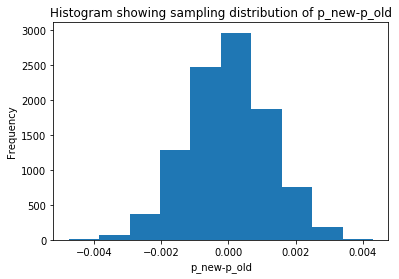

In [352]:
plt.hist(p_diffs)
plt.title("Histogram showing sampling distribution of p_new-p_old")
plt.xlabel("p_new-p_old")
plt.ylabel("Frequency")

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [354]:
k=df2.query("group=='treatment'")["converted"].mean()-df2.query("group=='control'")["converted"].mean()
print("{} proportion of the p_diffs are greater than the actual obesrved difference.".format(np.mean([1 if i>k else 0 for i in p_diffs ])))


0.9089 proportion of the p_diffs are greater than the actual obesrved difference.


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**
- Here we computed the probability of finding the observed value of the difference or a more extreme value in favour of the alternative, when the null hypothesis is true.
- In scientific studies, it is called p-value.
- Since the p-value here is much larger than level 0.05, as assumed in 1, we fail to reject the null hypothesis, that is the old page has at least as good conversion rate as the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [355]:
import statsmodels.api as sm

convert_old =df2.query("landing_page=='old_page'and converted==1").shape[0]
convert_new =df2.query("landing_page=='new_page'and converted==1").shape[0] 
n_old = df2.query("landing_page=='old_page'").shape[0]
n_new = df2.query("landing_page=='new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [356]:
import statsmodels.api as sm
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [357]:
#Calculating critical value
from scipy.stats import norm
print("The critical value for this test is: {}.".format(norm.ppf(1-(0.05))))

The critical value for this test is: 1.6448536269514722.


**Answer:**<br/>
We're doing an upper-tailed test here and the test statistic (1.31) takes a smaller value than the critical value (1.64), hence we fail we reject the null hypothesis, that is the old page has at least as good a conversion rate as the new page. <br/>
The findings here agree with those in j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

 The response is binary in nature here. So, we should use **logistic regression** here.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [290]:
#Creating an intercept
df2["intercept"]=1

#Creating dummy variables
df2[["","ab_page"]]=pd.get_dummies(df2["group"])
df2.drop(columns="",inplace=True)


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [292]:
#Fitting the logistic model
lm=sm.Logit(df2["converted"],df2[["intercept","ab_page"]])


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [293]:
#Summary of the regression
lm.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Dec 2018   Pseudo R-squ.:               8.077e-06
Time:                        12:51:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer**:<br/>

The p-value associated with *ab_page* is 0.190.<br/>
In part I our hypotheses was:<br/>
**Null hypothesis, ** 
**$H_{0}$** : **$p_{old}$** >= **$p_{new}$** <br/>
**Alternative hypothesis, ** 
**$H_{1}$** : **$p_{old}$** < **$p_{new}$** <br/>
<br/>
In part II our hypotheses is:<br/>
**Null hypothesis, ** 
**$H_{0}$** : **$p_{old}$** - **$p_{new}$** = 0<br/>
**Alternative hypothesis, ** 
**$H_{1}$** : **$p_{old}$** - **$p_{new}$** != 0<br/>

Hence the difference in p-values. However, here also we fail to reject the null hypothsis, that is the conversion rate for both old and new page are equal.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**<br/>
Considering more variables that might influence conversion rate may explain more variability of the response resulting in a better fit and a higher r-squared value.<br/>
However, if the independent variables are correlated among themselves, it might cause a problem of multiclinearity which leads to unstable estimates.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [294]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [299]:
#Looking at the new variables
print(countries_df.head(2))
#Number of unique countries present i the data
print("The countries present in the data: {}".format(countries_df["country"].unique()))

   user_id country
0   834778      UK
1   928468      US
The countries present in the data: ['UK' 'US' 'CA']


In [308]:
### Creating the necessary dummy variables
df_new[["CA","UK","US"]]=pd.get_dummies(df_new["country"])

#Fitting the logistic model
lm1=sm.Logit(df_new["converted"],df_new[["intercept","UK","US"]])

#Summary of the regression
lm1.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 03 Dec 2018   Pseudo R-squ.:               1.521e-05
Time:                        13:15:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

Ar level = 0.05, we fail to reject the null hypothesis, that is, conversion rate for each country is equal. In other other words, country doesn't have much impact on conversion. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [309]:

#Fitting the new logistic model
lm2=sm.Logit(df_new["converted"],df_new[["intercept","UK","US","ab_page"]])

#Summary of the regression
lm2.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 03 Dec 2018   Pseudo R-squ.:               2.323e-05
Time:                        13:16:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

At level = 0.05, we fail to reject all the null hypotheses, that is, neither the pages nor the countries have a signficant impact on conversion rate.

<a id='conclusions'></a>
## Conclusions

- First we saw saw from the probabilities of conversion that for old page the probability is slightly higher than that in case of the new page.
- However, both the hypothesis testing and the regression approach show that the difference is not statistically significant.
- Hence, it is advisable to keep the old page as there is no strong evidence favouring the new one.

